In [3]:
import numpy as np 
import math 
import seaborn 
import pandas as pd
import re 
from matplotlib.pyplot import *


In [4]:
daily = pd.read_csv('daily_sales.csv')
monthly = pd.read_csv('monthly_sales.csv')

In [5]:
#now to separate by food 
food = ['HM', 'CF', 'FF']
foods_mon={} 
foods_daily ={}
for i in food: 
    for j in daily.columns: 
        if i not in j: 
            continue

        if j[0:2] not in foods_daily.keys(): 
            foods_daily[i] = [j]
        else:
            foods_daily[i].append(j)
    for k in monthly: 
        if i not in k: 
            continue
        if k[0:2] not in foods_mon.keys(): 
            foods_mon[i] = [k]
        else:
            foods_mon[i].append(k)

In [6]:
#okay let's look at the sales data of a certain region 
reg_list = ['NE', 'SW', 'NW', 'SE', 'C']
regions = {} 
for i in reg_list: 
    for j in daily.columns: 
        if i in j : 
            if i not in regions.keys() : 
                regions[i] = [j]
            else: 
                regions[i].append(j)
regions 

{'NE': ['HM-NE', 'CF-NE', 'FF-NE'],
 'SW': ['HM-SW', 'CF-SW', 'FF-SW'],
 'NW': ['HM-NW', 'CF-NW', 'FF-NW'],
 'SE': ['HM-SE', 'CF-SE', 'FF-SE'],
 'C': ['CF-NE', 'CF-SW', 'CF-NW', 'CF-SE', 'HM-C', 'CF-C', 'FF-C']}

Questions that I have: does this take into consideration populations differences for different regions? 
Are there similar amounts of mcdonalds from each region? 


In [7]:
for i in reg_list: 
    print(i +' Monthly\n', monthly[regions[i]].median())
    print('Daily\n', daily[regions[i]].median(), '\n')

NE Monthly
 HM-NE    1480936.0
CF-NE     611044.0
FF-NE     361700.0
dtype: float64
Daily
 HM-NE    37007.0
CF-NE    16077.0
FF-NE     9101.0
dtype: float64 

SW Monthly
 HM-SW    1431260.0
CF-SW     603620.0
FF-SW     362897.0
dtype: float64
Daily
 HM-SW    36046.0
CF-SW    15068.0
FF-SW     9015.0
dtype: float64 

NW Monthly
 HM-NW    1440957.0
CF-NW     590437.0
FF-NW     351612.0
dtype: float64
Daily
 HM-NW    35901.0
CF-NW    15408.0
FF-NW     8765.0
dtype: float64 

SE Monthly
 HM-SE    1397616.0
CF-SE     581824.0
FF-SE     349535.0
dtype: float64
Daily
 HM-SE    35134.0
CF-SE    14939.0
FF-SE     8436.0
dtype: float64 

C Monthly
 CF-NE     611044.0
CF-SW     603620.0
CF-NW     590437.0
CF-SE     581824.0
HM-C     1381392.0
CF-C      572688.0
FF-C      345807.0
dtype: float64
Daily
 CF-NE    16077.0
CF-SW    15068.0
CF-NW    15408.0
CF-SE    14939.0
HM-C     36386.0
CF-C     14447.0
FF-C      8993.0
dtype: float64 



In [8]:
#okay now lets look at monthly sales '
months = {} 

for j in monthly['Month, Year']: 

    if j[0:3] not in months.keys() : 
        months[j[0:3]] = [j]
    else: 
        months[j[0:3]].append(j)
months 

{'Jan': ['Jan-16', 'Jan-17', 'Jan-18', 'Jan-19'],
 'Feb': ['Feb-16', 'Feb-17', 'Feb-18', 'Feb-19'],
 'Mar': ['Mar-16', 'Mar-17', 'Mar-18', 'Mar-19'],
 'Apr': ['Apr-16', 'Apr-17', 'Apr-18', 'Apr-19'],
 'May': ['May-16', 'May-17', 'May-18', 'May-19'],
 'Jun': ['Jun-16', 'Jun-17', 'Jun-18', 'Jun-19'],
 'Jul': ['Jul-16', 'Jul-17', 'Jul-18', 'Jul-19'],
 'Aug': ['Aug-16', 'Aug-17', 'Aug-18', 'Aug-19'],
 'Sep': ['Sep-16', 'Sep-17', 'Sep-18', 'Sep-19'],
 'Oct': ['Oct-16', 'Oct-17', 'Oct-18'],
 'Nov': ['Nov-16', 'Nov-17', 'Nov-18'],
 'Dec': ['Dec-16', 'Dec-17', 'Dec-18']}

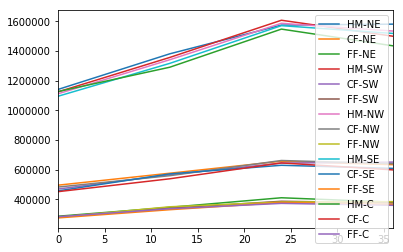

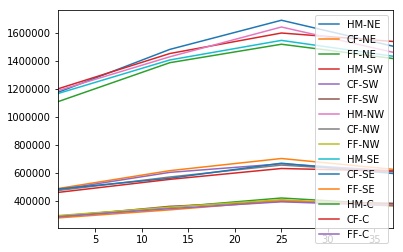

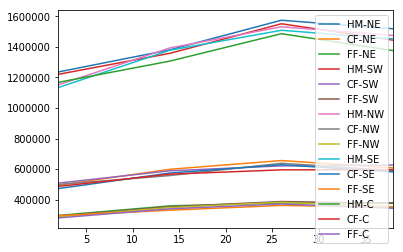

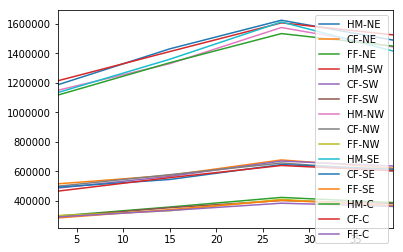

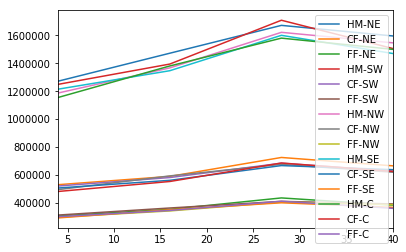

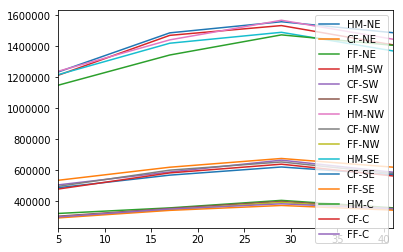

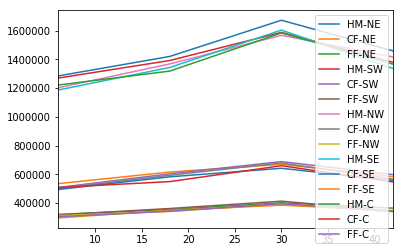

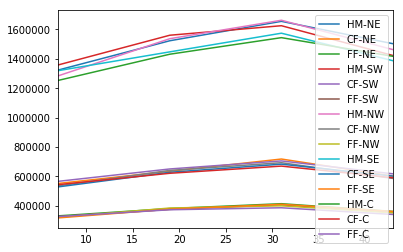

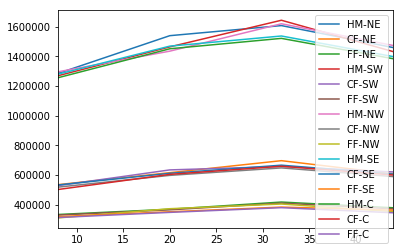

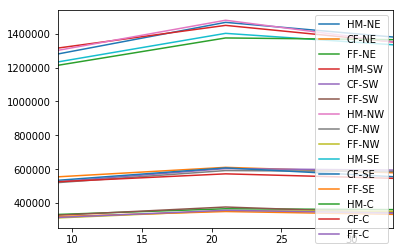

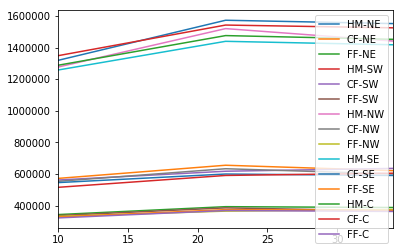

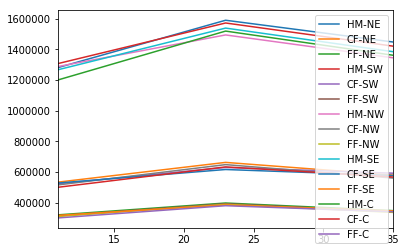

In [9]:
mn = [] 
for i in months.keys(): 
    mon = monthly['Month, Year'].apply(lambda x: x in months[i])
    cal = monthly.loc[mon]
    
    cal.plot()
    mn.append(cal)
    cal

In [10]:
foods_mon

{'HM': ['HM-NE', 'HM-SW', 'HM-NW', 'HM-SE', 'HM-C'],
 'CF': ['CF-NE', 'CF-SW', 'CF-NW', 'CF-SE', 'CF-C'],
 'FF': ['FF-NE', 'FF-SW', 'FF-NW', 'FF-SE', 'FF-C']}

In [11]:
names = {'HM' :'Hamburger',
'CF':'Chicken fillet',
'FF': 'Fish fillet'} 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


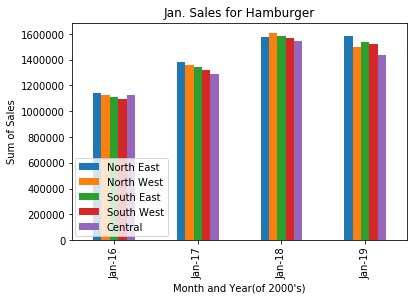

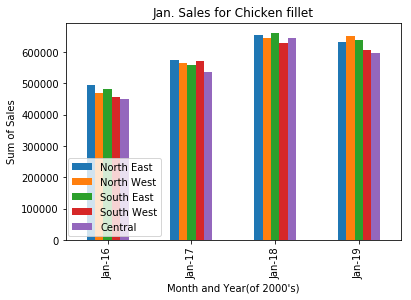

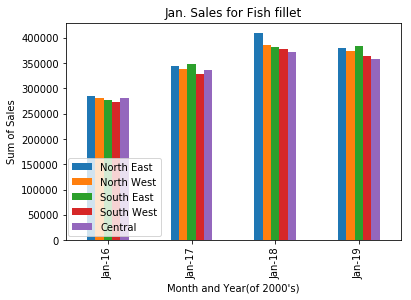

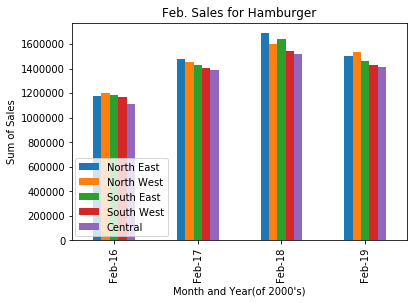

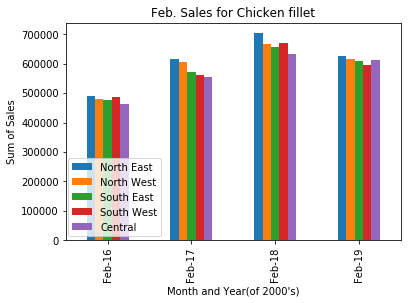

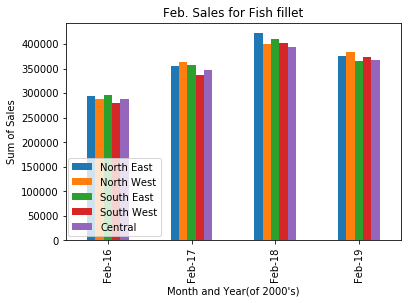

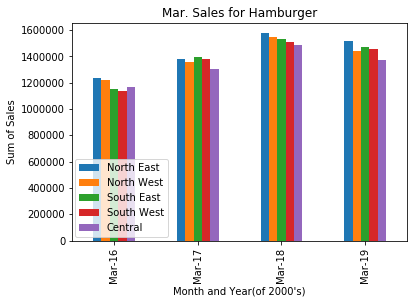

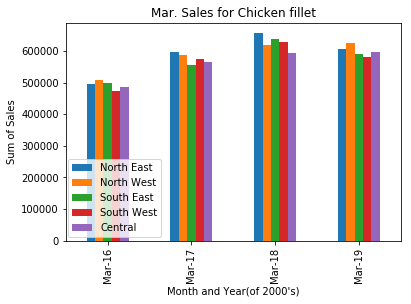

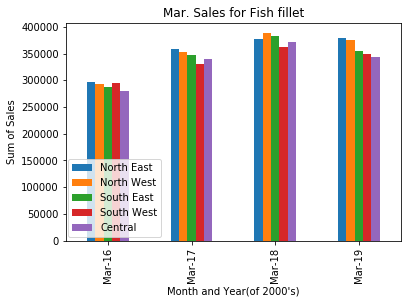

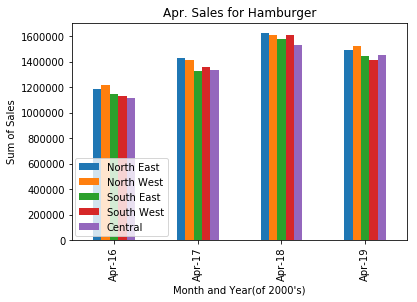

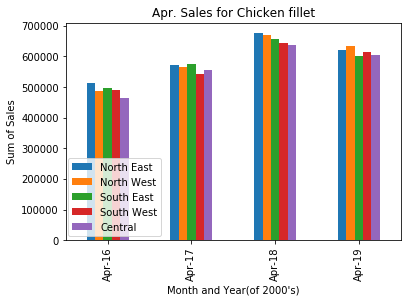

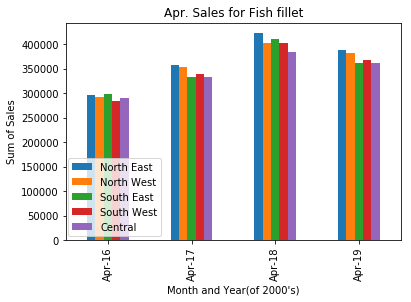

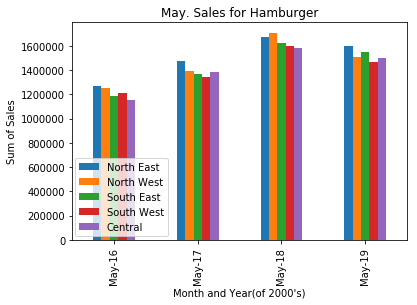

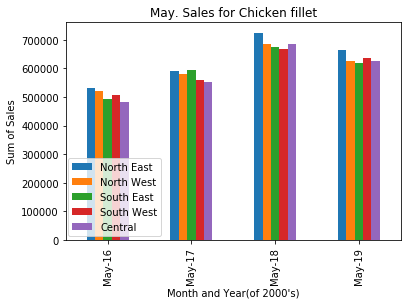

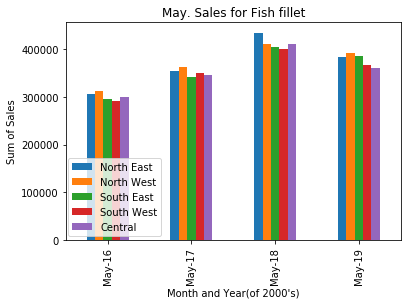

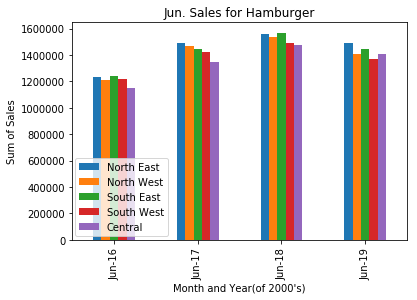

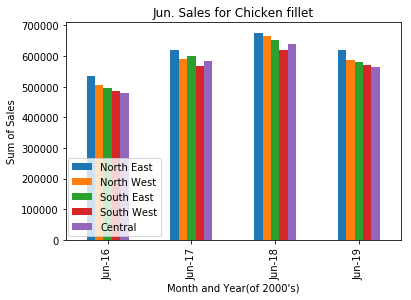

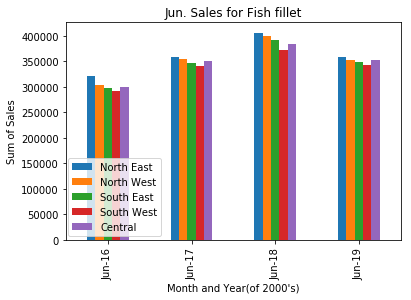

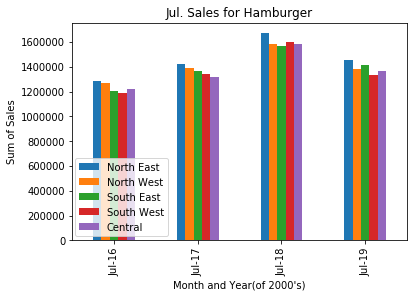

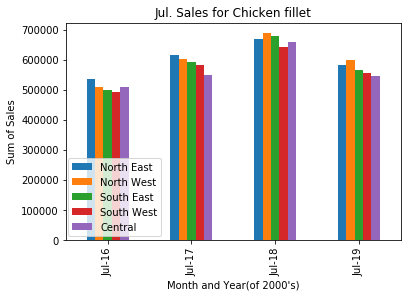

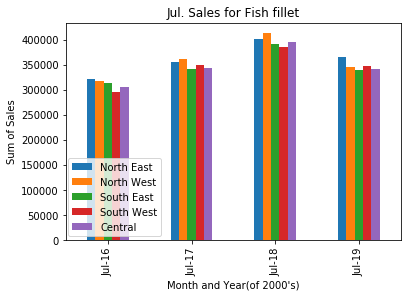

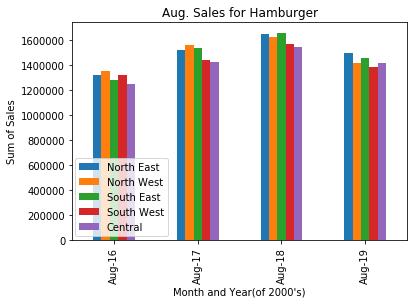

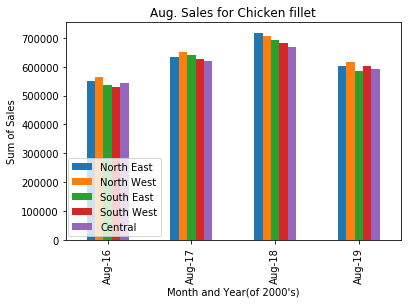

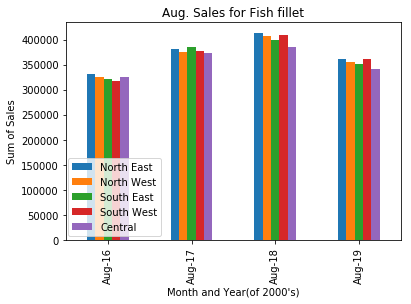

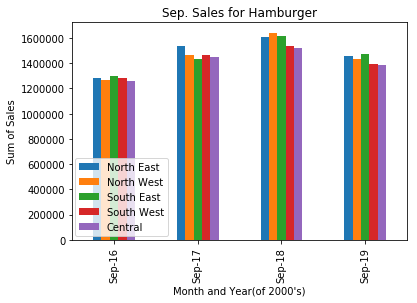

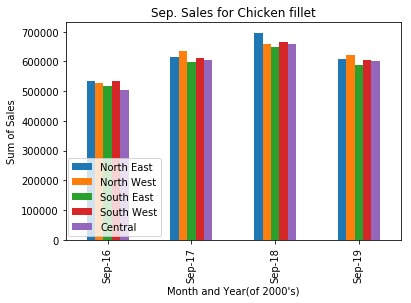

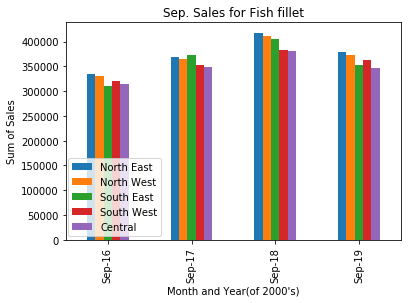

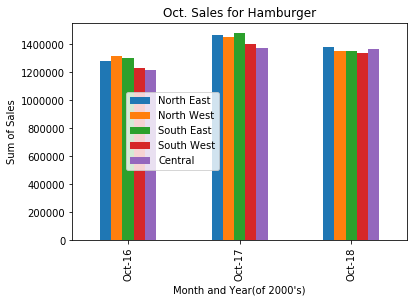

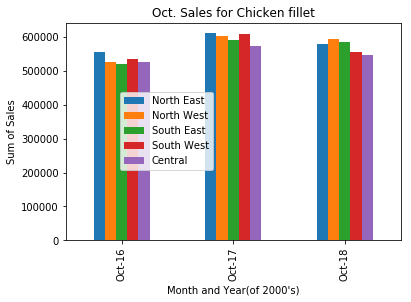

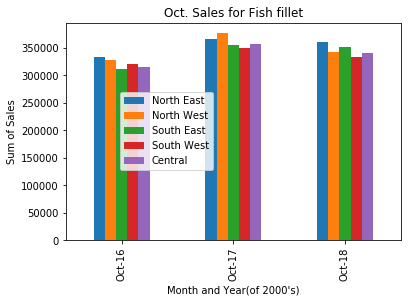

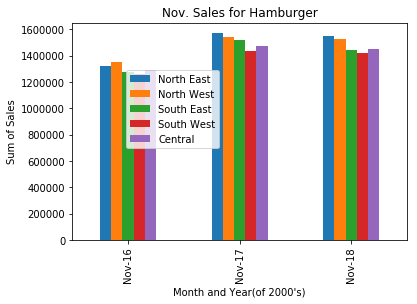

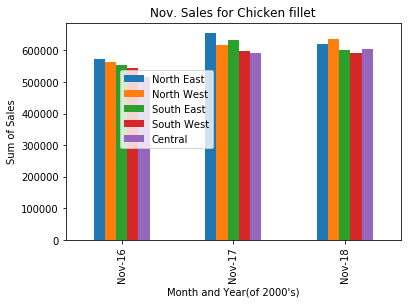

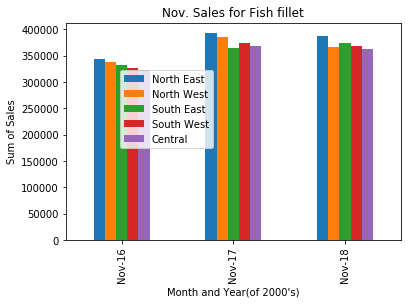

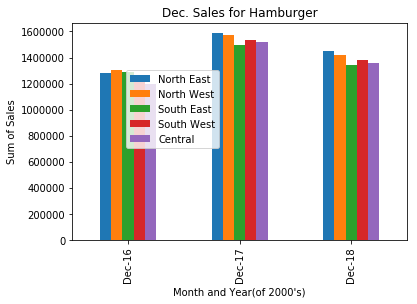

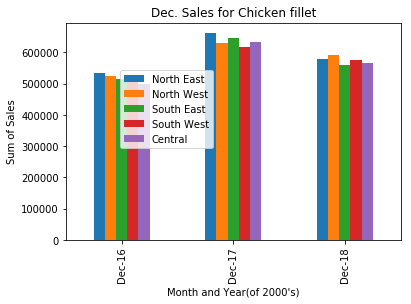

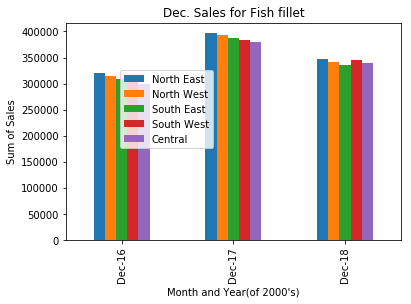

In [29]:
#looking at month every year 
labels = ['North East','North West','South East','South West',  'Central']
for i in mn: 
    for j in foods_daily.keys(): 
        col = foods_daily[j][:]
        col.append('Month, Year')
        
        ax = i[col].plot(kind='bar', x='Month, Year', title=list(i['Month, Year'])[0][0:3] + '. Sales for '+ names[j])
        ax.set_xlabel("Month and Year(of 2000's)")
        ax.set_ylabel("Sum of Sales")
        ax.legend(labels=labels)
        ax.get_legend().set_bbox_to_anchor((.3, .4))
        if ('Oct'== list(i['Month, Year'])[0][0:3]):
            ax.get_legend().set_bbox_to_anchor((.3, .3))
            ax.get_figure().savefig('Oct'+names[j]+'.png')


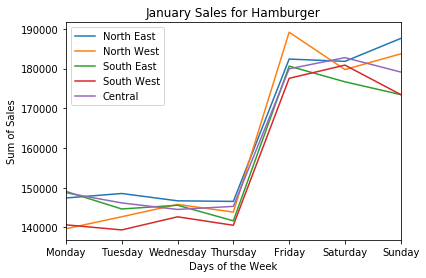

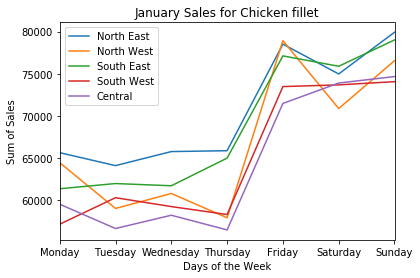

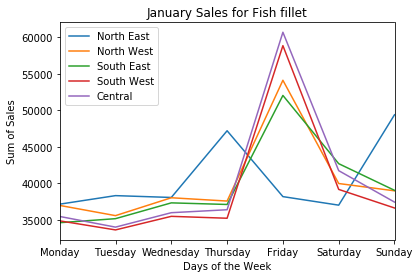

In [17]:
#can only make trends of time and the amount of food, maybe day of week fr
labels = ['North East','North West','South East','South West',  'Central']
lst = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in foods_mon.keys(): 
    if i in ['Unnamed: 0', 'Day']: 
        continue 


    ax = daily[foods_mon[i] + ['Unnamed: 0']].groupby('Unnamed: 0')[foods_mon[i]].sum().loc[lst].plot(\
                                    title='January Sales for '+ names[i])
    ax.legend(labels=labels)
    ax.set_xlabel("Days of the Week")
    ax.set_ylabel("Sum of Sales")
    ax.get_figure().savefig('January '+names[i]+'.png')

    

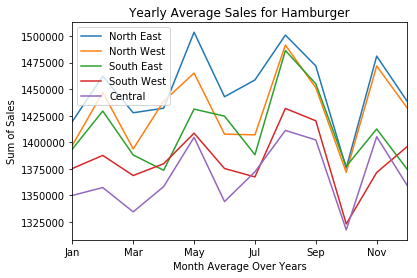

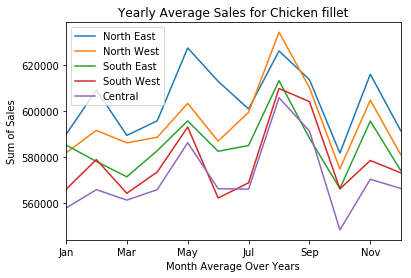

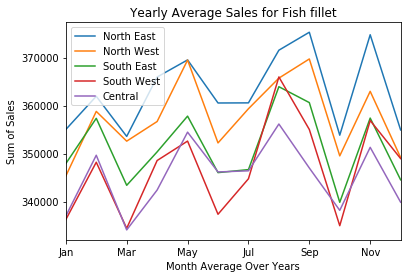

In [15]:
ser = monthly['Month, Year'].apply(lambda x: x[0:3])
monthly['Month Average Over Years'] = ser
for i in foods_mon.keys(): 


    ax = monthly[foods_mon[i] + ['Month Average Over Years']].groupby('Month Average Over Years')[foods_mon[i]].mean().loc[months.keys()].plot(\
                                    title='Yearly Average Sales for '+ names[i])
    ax.legend(labels=labels)
    ax.set_ylabel("Sum of Sales")
    ax.get_figure().savefig('year'+ names[i]+'.png')